# Introduction

### Project background and aims

There is a attitude that still pervades in the UK of people leaving the rush of urban areas for rural areas to seek a slower pace, a better work life balance and generally a happier life. 

The UK media often has tables of best cities/areas to live/work in the UK based on various metrics. I wish to see whether these feelings translate into online job reviews and try to spot patterns as to whether geographical area has an effect on job satisfaction/perception. I feel that often the media take a very general approach to catagorising cities/areas and want to see whether a finer grained analysis reveals different patterns. Do happier workers tend to work in the centre of cities? Are the happiest workers working in purely rural areas?. To support this I also want to separate the location of job review postings into various classifications based on how urban/rural they are and observe the attitude of workers in these catagories.

I find this subject of interest as I myself have had experience of moving from a very urban location to a very rural one and have found a shift in job experience. I am about to start the job search again and wish to see if patterns found in this project can help me focus my search better. 

This project was inspired by two papers firstly by Atherton et al, in which the psychological wellbeing of people was studied based on their either urban or rural location in the USA and found that in general people in rural areas are less happy than those in urban areas and secondly by Gottipati et al, in which job descriptions on Glassdoor.com were analysed to ascertain required skills in data science roles and aid educational providers in designing relevant educational content. 

As a process I wish to do the following:

- Acquire and process job review data, I will focus on metrics relevant to individuals perception of their own jobs rather than metrics relating to a wider geographical context.
- Utilise the Nominatim API to fetch data of the location of each job review posted. Such as geographical area (such as a county, suburb, town or city), latitude and longitude.
- Utilise rural urban classification lookup tables to classify the area into one of 6 catagories.
- Analyse overall data in the form of chorpleth maps and diagrams to spot patterns at a more local level.
- Analyse overall data to get further clues as to the feeling of people in jobs in England.

To provide a richer source of data I wish to focus on England based reviews only. I feel this will allow for a sufficient amount of reviews while keeping the data size within project requirements. This will combat the problems of reviews being spread too thinly over a large geographical area.

Finally I wish to analyse the feelings of workers in jobs in the UK from the review text and present these in wordclouds to get an idea of what people see as positve aspects of jobs and what people see as negative aspects of jobs.

From this I wish to find that job satisfaction based on geographical locations is far finer grained than previously reported. I hope to find patterns in map data to support my aims.

# Data Sources

### Job Review Data

I decided to utilise reviews from Glassdoor.com to ascertain employee attitudes towards their jobs in the UK.

The Glassdoor.com job review data for this project has been downloaded from Kaggle.com in CSV format. I felt the CSV format had a number of advantages over other formats. Firstly it provided me with a stable source of data so I did not have to utilise webscraping or an API to acquire tens of thousands of job reviews. I had concerns that scraping or using an API for so much data would be too risky. Secondly The CSV was already formatted with relevant column names for easy use as a Pandas dataframe.

Glassdoor.com provides essentially four types of data to review jobs: 

firstly numerical scoring metrics with the following headings:

- "Overall Rating": An overall rating of the job (higher being better).
- "Work-life Balance": Perceived work-life balance of the job (higher being a better work life balance).
- "Culture and Values": Perceived Culture and Values of the company (higher being better).
- "Diversity and Inclusion": Perceived diversity and inclusion within the company (higher being a greater diversity and inclusion)
- "Career Opportunities": Perceived progression opportunities in the job. (higher being better opportunities)
- "Compensation and Benefits": Perceived compensation (pay) and benefits of the job. (higher being better)
- "Senior Management": Perceived view of senior management in the job. (higher being a more favourable view) 

Secondly text based subjective option with he following headings:   

- "Headline": A summary of their opinion.
- "Pros": Perceived pros of the job.
- "Cons": Perceived cons of the job.

Thirdly boolean data with the following headings.   

- "Recommended": Whether an employee recommends working for the company.
- "CEO Approval": Whether an employee approves of the company CEO.
- "Outlook": Whether the employee thinks the company has a positive future.
- "Current": Whether reviewer is a current or past employee.

Lastly factual data is provided for each job review with the following headings:

- "Firm": Name of firm.  
- "Date of Review": Date review was posted.
- "Job Title": Job title review was posted for. 
- "Location": location of worker writing review.

As one can see Glassdoor reviews provide a rich source of data relating to the research topic. I felt that the combination of numerical metrics allow for a standardised gauge of a persons attitude to their job, 'pros' and 'cons' also allow for a more granular text based analysis of peoples opinions. Most importantly each job review contains a location which is a requirement to link more detailed geographical data to it.

Other sources of data were available. I firstly considered utilising Glassdoors free API which would have given far more 
up to date data, however its use is very restricted, I felt that getting the required number of job reviews with the right amount of detail would take too much time. I also considered scraping Glassdoor myself but scraping this much data from Glassdoor had a very real risk of breaking their terms and conditions. 

Indeed.coms API was seriously considered as an alternative source of job reviews. The advantage of using Indeed.com's API over the Glassdoor reviews CSV or its API is it was less restrictive, free to use and would have allowed up to date information to be gathered. The disadvantages of using Indeed's job reviews is that Glassdoor is a far more established review site and the quantity of reviews was far greater. The main reason I discounted indeed in the end however is that they lack a standardised location within their job reviews with a lot of locations inputted in a freeform way. This would have made gathering geographical location far harder.

### Geographical Data

The geographical data for this project will be acquired using the Nominatim API. this API allows one to geocode address using Open Street Map (OSM) data. This data source will allow me to fetch more geographical data from the location of the job reviews.

I wish to obtain the following data from the API relating to the locations on the job reviews to locate them on a map and apply rural/urban classification.

- Geographical Area.
- Latitude.
- Longitude.

The Nominatim API module in Python provides options to download these individual values in separate requests, however the Nominatim terms and conditions are restrictive on the amount and frequency of requests made. I have concerns searching for a large list of locations for each individual attribute might break their terms and conditions. As a result of this I have decided to use the python module to download the raw Json data in one operation save this locally and filter it myself.

### Rural Urban Classification Data

For urban/rural classification data I will be using the "Rural Urban Classification 2011 lookup tables" available from the UK government. I have converted these locally from ods format to csv format in order to make reading the file in the jupyter notebook more straightforward as ods files require modules to be installed but not imported. 

I felt this data in this format would provide the best way to classify locations. Firstly the locations it uses are use official area names. I felt this gave me the best chance at finding a match when the rural urban classification was eventually applied. The columns within the csv have defined columns for location and classification which neatly translate to a pandas dataframe.   

The rural urban classifications provided in this data are outlined below. These will be how I will classify and separate the job review data later.

1. Mainly Rural (80% or more of the population resides in rural areas)
2. Largely Rural (Between 50% and 79% of the population resides in rural areas)
3. Urban with Significant Rural (Between 26% and 49% of the population resides in rural areas)
4. Urban City and Town
5. Urban with Minor Conurbation
6. Urban with Major Conurbation

(Classifications taken from UK Government, 2021)

### Ethical Statement on Data Sources

The Glassdoor data from Kaggle is provided under the Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) creative commons license meaning it is free to use and modify. The Attribution-Sharealike 4.0 licence indicates that it must be stated if the data has been modified which in the case of this project it has. The creator of the original data set does not endorse me or this project.

In creating this project and adding to the data I have in fact created a new form of intellectual property which is under a new creative commons licence. 

This data has however been scraped from Glassdoor fetching reviews from 2008 up until 2021. There is not indication as to whether the data is purely webscraped or retrieved using Glassdoors API. This falls into a legal grey area regarding copyright. As scraping data while logged into Glassdoor is illegal but scaping publicly available information is not. The data of the reviews up until 2021 indicate that there is a possibility they have been downloaded with the free API. 

The data provided by Glassdoor contains no identifiable information on the poster such as a name. The most likely source of identifiable information are the 'pros' 'cons' and 'headline' fields within the reviews. In the process of this study however the headline field is discounted and the 'pros' and 'cons' fields are aggregated into word clouds effectively anonymising individual users data.  

The Nominatim API fetches Open Street Map data. Open Street Map data is available under the Open Streetmap license. altering or building upon and OSM data requires it it distributed under the OSM licence. The Nominatim API itself has a number of conditons on usage I have consider these in my code and these are explained below.

The locations of the reviews are generalised and OSM location information cannot be use to identify the location of any individual review poster or their company.

Rural Urban classifications are obtained from the Office of national statistics and are free to use under their licence. 

# Data Acquisition and Cleansing

Below I will outline my process of acquiring, cleaning and processing the three data types outlined. These will then be combined into a locally saved CSV copy for analysis. For this project I will utilise the following python modules. 

In [2]:
#import libraries and modules for use in the project
#For operating system operations
import os
#For array and dataframe creation
import numpy as np
import pandas as pd
#To use Nominatim API
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
#To process json files
import json
#To plot line plots
import seaborn as sns
import matplotlib.pyplot as plt
#To create choropleth maps
import folium
import branca.colormap as cm
#to create wordclouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Checking CSV File Size

The file size in megabytes of the downloaded CSV of Glassdoor job reviews is checked. Note: As the original CSV file will not be included in the  submission the affected code will be commented out. I will use the python os module within a function to carry this out.

In [40]:
'''
#function to print file size of CSV in mb taking file name of CSV file as argument
def CSV_file_size(CSV_file_name): 
    # Calculation of file size in megabytes. This is done by returning the file size in bytes using os.stat.st_size, 
    # then dividing by (1024 * 1024) to get the size in mb then it is rounded to 2 decimal places using round.
    # method taken from https://stackoverflow.com/questions/6591931/getting-file-size-in-python
    # https://stackoverflow.com/questions/6080477/how-to-get-the-size-of-tar-gz-in-mb-file-in-python
    file_size_mb = round(os.stat(CSV_file_name).st_size / (1024 * 1024), 2)
    #print file size in megabytes 
    print(file_size_mb)

CSV_file_size("glassdoor_reviews.csv")
'''

279.29


The CSV file is 279.29mb in size. Next I will use pandas to create a dataframe to allow me to measure the number of rows in the CSV.

In [41]:
'''
#creating reviews dataframe from original csv file.
reviews = pd.read_csv('glassdoor_reviews.csv')
#reviews.shape[0] returns numbers of rows by returning the shape of the dataframe in dimension 0 
reviews.shape[0]
'''

838566

The CSV File has 838566 rows.

The CSV file is 279mb in size and consists of 838566 rows of data. This is far too large for this project. The data within the original CSV will be partially filtered down to produce a CSV file which is under the 10MB limit. I will leave some erroneous data in the reduced CSV in order to demonstrate its cleaning with running code.

### Dropping Missing Values

dropna() is called on the pandas dataframe to drop any rows with NAN/missing values. This should provide a reasonable first attempt at reducing the file size as it will filter out the data lowest quality reviews (those which have fields missing or are blank) 

In [42]:
'''
reviews = reviews.dropna()
'''

In [43]:
'''
reviews.shape[0]
'''

108627

As one can see omitting lower quality reviews with missing values has reduced the rows significantly.

### Filtering Reviews by Geographical Location

For this project I want to only concentrate on the England as a geographical region. The dataset itself is described as UK data only but I want to check this. I want to create a dataframe of non UK reviews. This is created by seeing whether the location column contains the string "England", "Scotland", "Northern Ireland" or "Wales" and then inverting the query.

In [44]:
'''
#create a new dataframe containing non UK reviews utilising the ~ operator which will fetch the inverse of the query
#https://stackoverflow.com/questions/37011734/pandas-dataframe-str-contains-and-operation
#https://stackoverflow.com/questions/46054318/tilde-sign-in-pandas-dataframe
non_uk_reviews = reviews[~reviews['location'].str.contains('England|Scotland|Northern Ireland|Wales')]
#display dataframe head
non_uk_reviews.head(1)
'''

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
942,ALDI,2021-02-23,Order Picker,Former Employee,Dubai,1,1.0,1.0,1.0,1.0,1.0,1.0,o,o,o,Section Leaders are POOR in CHILL,Money is good for what you have to do,Poor management and needs reviewed


As one can see the original data did in fact contain reviews from a multitude of other countries. I will create a filtered dataframe of England reviews with a variation of the code above. 

In [45]:
'''
#create a new dataframe containing England only reviews
england_reviews = reviews[reviews['location'].str.contains('England')]
'''

Next I will use pandas to take a random sample of the UK_reviews dataframe to bring the file size down further.

In [46]:
'''
#https://www.geeksforgeeks.org/python-pandas-dataframe-sample/
england_reviews = england_reviews.sample(n=10000)
'''

### Saving Filtered CSV

Next I will use pandas to save the reduced dataframe to a csv file locally.

In [47]:
'''
england_reviews.to_csv('england_reviews.csv', index=False)
'''

Next I will use the CSV_file_size function to recheck the size of the csv 

In [49]:
'''
CSV_file_size("england_reviews.csv")
'''

3.13


The CSV file has now been reduced to a far more manageable size which will is included in the project folder. 

### Opening Filtered CSV Into New Dataframe

The csv file is reopened as a pandas dataframe and checked to see it has retained correct column titles and format 

In [40]:
england_reviews = pd.read_csv('england_reviews.csv')
england_reviews.head(1)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,Royal-Mail,2021-05-08,Postman/Woman With Driving,"Current Employee, more than 5 years","Northampton, England, England",3,4.0,1.0,1.0,1.0,2.0,3.0,v,x,r,jhjgfd,"freedom, casual, easy, outdoor and self reliant","poor management, poor communication, poor culture"


### Reformatting Location Column and Removing Unwanted Metrics

On opening the CSV into a dataframe I have noticed the location column contains messy formatting which will make automatically searching for geographical data more challenging. I wish to reformat the column so simply displays the place name and the country once. The below column transformation in the code applies a function to extract the first and last words from the strings in the columns.

As mentioned in the introduction I also wish to only focus on job review metrics that relate to the to a persons individual experience of their job. This requires the dropping of some columns in the dataframe. I also wish to drop some descriptive columns as I feel they are not relevant to the project. These columns and reasons for dropping are outlined below.

- "firm": I wish to average out different firms and not break reviews down per firm.
- "date_review": I wish to average out reviews over a number of years rather than break them down by year.
- "job_title": I want to average out reviews over all job titles.
- "current": I don't feel that whether a worker is current or former has an effect on the review in this case.
- "culture_values": The culture and values relates more to the company as a whole rather than a persons job.
- "diversity_inclusion": Diversity and inclusion relates to the company as a whole rather than a persons job.
- "ceo_approv": Ceo approval relates to the company as a whole.
- "recommended": whether the company is recommended or not applies to the company as a whole.
- "outlook": Company outlook applies to the company as a whole.
- "headline": Even though useful the headline is none standardised, therefore it often includes a title, or summarised review. I decided to drop this in favour of pros and cons which were more standardised.

The below code drops irrelevant columns from the england_reviews dataframe.

In [41]:
#column transformation takes the location column of the dataframe and applys a lambda function to the column, 
#It splits the string before the first comma fetching the town or city at the front of the string then splits 
#the string again fetching the country at the end of the string. It then concatenates these together with a 
#comma in the middle
#https://stackoverflow.com/questions/30945461/regex-find-last-word-between-comma
england_reviews['location'] = england_reviews['location'].apply(lambda x: x.split(",")[0] + "," + x.split(",")[-1])
# irrelevant columns are then dropped from the dataframe
england_reviews = england_reviews.drop(columns=['firm', 'date_review', 'job_title',  'current', 'culture_values', 
                                                'diversity_inclusion', 'ceo_approv', 'recommend', 'outlook', 'headline'])

england_reviews.head(1)

,location,overall_rating,work_life_balance,career_opp,comp_benefits,senior_mgmt,pros,cons
0,"Northampton, England",3,4.0,1.0,2.0,3.0,"freedom, casual, easy, outdoor and self reliant","poor management, poor communication, poor culture"


### Creating New Locations Dataframe

Next I wish to create a new dataframe of review locations. this is in order to retrieve detailed geographical data from the Nominatim API. To do this I first create a new pandas dataframe which will just contain locations. I have also kept the overall_rating column for reasons I will outline below.

In [63]:
# a new dataframe is created containing the location and the overall rating, the overall rating column is kept in order 
#for the groupby method to return a new dataframe instead of a groupby object 
england_reviews_locations = england_reviews[['location','overall_rating']].copy()
england_reviews_locations.head(1)

,location,overall_rating
0,"Northampton, England",3


Next I aggregate the rows based on location while also aggregating the overall_rating column. The reason for keeping the overall_rating column is it preserves the resulting object as a pandas dataframe rather than a groupby object.

In [64]:
#aggregation functions dictionary is created to inform the aggregate method how to treat the values of the overall_rating 
#column in this case the mean of the values is calcualted when the rows are grouped
#https://stackoverflow.com/questions/75313765/pandas-column-not-found-after-doing-an-aggregation-function
aggregation_functions = {'overall_rating':'mean'}
#the england_reviews_locations dataframe is grouped by location, the index is reset on the dataframe and the mean is 
#rounded to two decimal places
england_reviews_locations = england_reviews_locations.groupby(england_reviews_locations['location']
                                                             ).aggregate(aggregation_functions).reset_index().round(2) 

Next I drop the overall_rating column to leave a single columned dataframe which contains all the locations of the reviews.

In [65]:
#overall_rating column dropped from dataframe
england_reviews_locations = england_reviews_locations.drop(columns=['overall_rating'])
england_reviews_locations.head(1)

,location
0,"Abingdon, England"


The resulting dataframe contains 718 locations which will next be used to fetch detailed geographical data from the Nominatim API.

In [66]:
england_reviews_locations.shape[0]

718

### Fetching OSM data with Nominatim API

Next I will utilise the Nominatim API to fetch geographical information for each of the locations in the dataframe. The Nominatim API has a number of terms and conditions relating to its use. These include having only one request per second, requirement to cache results client side, and not to search for long lists of locations.

Even though I did have a list of over 700 locations I attempted to mitigate this by using the API only once to fetch them and limiting my requests to one per second. The Nominatim python module provided a useful rate limiter in order to achieve this.

As mentioned The Nominatim module also provides functionality to download the three specific values individually. However I decided that this would result in three requests per location. I instead decided to request the entire json data of each location save it client side and filter it myself. Resulting in only one request per location.

The below code is commented out as running takes some time.

In [108]:
'''
#https://stackoverflow.com/questions/58439692/convert-physical-addresses-to-geographic-locations-latitude-and-longitude
#https://nominatim.org/release-docs/latest/api/Search/
#geolocator variable set to Nominatim user_agent set to comply with Nominatim T&Cs
geolocator = Nominatim(user_agent='myapplication')
#rate limiter set to limit requests to one per second to keep within Nominatim T&Cs
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
#column transformation takes the location column and uses a lambda expression to check the Nominatim API for the location
#it then creates a new column in the england_reviews dataframe storing the returned json data if the API returns nothing 
#null is returned
england_reviews_locations['json_data'] = england_reviews_locations['location'].apply(
    lambda x: geocode(x, addressdetails=True).raw if geocode(x, addressdetails=True) else None)
#saves the entire dataframe to a new json file to keep client side and avoid multiple requests
england_reviews_locations.to_json("england_reviews_locations.json")
'''

### Reading and Parsing json Data

The saved json data is now read into a pandas dataframe (england_locations) which contains columns for the location and its related json data.

In [53]:
england_locations = pd.read_json("england_reviews_locations.json")

Values for which data has not been found (NA values) are dropped

In [54]:
england_locations = england_locations.dropna()

In [55]:
england_locations.head(1)

,location,json_data
0,"Abingdon, England","{'place_id': 348332696, 'licence': 'Data © Ope..."


The json data is then parsed and filtered to return required area, latitude and longitude values to add to new columns in the england_locations dataframe. The below function parses the json data to return the area of the location. 

A major challenge in parsing the json data is the different ways area/city names are recorded. Retrieving city, town and conurbation names all takes a slightly differnt process in order to get a name matching that on the rural urban classification tables. London also has a different naming structure than the rest of the country. I have tried to formulate a series of conditional statments to correctly filter these out.

In [56]:
def parse_json_area(x):
    # try to set variable as list of keys in address value of json this is a further check to see that no incompatible 
    # data has been sent by the API
    try:
        address_info_keys = list(x['address'].keys())
    # return null if no address keys found
    except:
        return None
    # a list of phrases to strip from the returned city names or london boroughs in order to match them to the places 
    #in the rural urban classification tables
    strip_phrases = ['London Borough of ', 'Royal Borough of ', ' City Region', 'Greater ', 'City of ']
    # replace phrases replace newer place names with older versions of the place names. This is because 
    # the rural urban classification tables were compiled in 2011 and place names have changed since then. 
    replace_phrases = {'East Yorkshire' : 'East Riding of Yorkshire','West Yorkshire' : 'North Yorkshire', 
                       'West Midlands Combined Authority' : 'Birmingham', 'Westmorland and Furness' : 'Cumbria', 
                       'Tyne and Wear' : 'Newcastle'}
    # a list of smaller to mid size cities in the UK, due to the limits and formatting of the information retrieved 
    # by the Nominatim a list was required to search though and see if the location was a smaller to mid size city
    #taken from https://www.gov.uk/government/publications/list-of-cities/list-of-cities-html
    cities = ['Bath','Bradford','Brighton','Bristol','Cambridge','Canterbury','Carlisle','Chelmsford' 
                'Chester','Chichester','City of London','Colchester','Coventry','Derby','Doncaster','Durham','Ely','Exeter' 
                'Gloucester','Hereford','Kingston-upon-Hull','Lancaster','Leeds','Leicester','Lichfield' 
                'Lincoln','Milton Keynes','Norwich','City of Nottingham','Oxford', 
                'Peterborough','Plymouth','Portsmouth','Preston','Ripon','Salford','Salisbury','Sheffield',
                'Southampton','Southend-on-Sea','St Albans','Stoke on Trent','Sunderland','Truro','Wakefield',
                'Wells','Winchester','Wolverhampton','Worcester','York']
    # a list of larger towns to search for for reasons similar to the list of smaller to mid size towns
    towns = ['Richmond', 'Slough', 'Reading']
    # for loop to search through towns list 
    for town in towns:
        #if the first substring before the comma in the display_name string matches a town
        if x['display_name'].split(",")[0] == town:
            #set variable town name to jsons town value in its address value
            town_name = x['address']['town'] 
            
            return town_name
    # for loop to search through cities list
    for city in cities:
        #if the first substring before the comma in the display_name matches a city 
        if x['display_name'].split(",")[0] == city:
            #set the city name to the city value in the address value
            city_name = x['address']['city']
            # search through the strip phrases
            for phrase in strip_phrases:
                # replace any matching string with nothing effectivly deleting it
                # https://www.w3schools.com/python/pandas/ref_df_replace.asp
                city_name = city_name.replace(phrase, '')
                
            return city_name
    # special case statement to differentiate central london from other london boroughs
    if x['display_name'].split(",")[0] == 'London':
            #return City of London string to match classification tables
            return 'City of London' 
                
    # statement to sort smaller towns and villages and return the county they are located in.
    if 'county' in address_info_keys:
        # set variable county to json address values county value
        county = x['address']['county']
        # strip out any phrase in the strip phrases
        for phrase in strip_phrases:
            county = county.replace(phrase, '')
        # replace any newer county name with an older county name    
        for key in replace_phrases:
            county = county.replace(key, replace_phrases[key])
            
        return county
    # statement to search for city district, this applies to locations such as london boroughs
    elif 'city_district' in address_info_keys:
        # set variable to json address values city_district value
        city_district = x['address']['city_district']
        # strip out any phrase in the strip phrases
        for phrase in strip_phrases:
            city_district = city_district.replace(phrase, '')
        # replace any newer county name with an older county name
        for key in replace_phrases:
            city_district = city_district.replace(key, replace_phrases[key])
            
        return city_district
    # statement to search for state district, this applies to locations such as larger conurbations
    elif 'state_district' in address_info_keys:
        state_district = x['address']['state_district']
        # strip out any phrase in the strip phrases
        for phrase in strip_phrases:
            state_district = state_district.replace(phrase, '')
        # replace any newer county name with an older county name
        for key in replace_phrases:
            state_district = state_district.replace(key, replace_phrases[key])
            
        return state_district
    #if none of the above conditions match meaning it is a non valid location return none
    else:
        return None

The below function parses the latitude from the json data. Out of bound values are checked for at this stage to check whether Nominatim has fetched the correct data and not data from a different country. 

In [57]:
# function to return latitude value  of location from json file    
def parse_json_lat(x):
    # try to find jsons lat value and return as float this is further check to see that no incompatible 
    # data has been sent by the API
    try:
        latitude = float(x['lat'])
        #statement to check that latitude returned by Nominatim are not out of bounds and fall within confines of 
        #England return null if not to make sure API has not returned locations outside of the UK by accident
        #latitude longitude taken from https://www.latlong.net/
        if latitude > 49.955401 and latitude < 55.811075:

            return latitude
        # else return null
        else:
        
            return None
    # if exception thrown because value cannot be found return null
    except:
        
        return None

The below function parses the longitude from the json data. Out of bound values are checked for at this stage to check whether Nominatim has fetched the correct data and not data from a different country. 

In [58]:
# function to longitude    
def parse_json_lon(x):
    # try to find jsons long value and return as float this is further check to see that no incompatible 
    # data has been sent by the API
    try:
        longitude = float(x['lon'])
        #statement to check that longitude returned by Nominatim are not out of bounds and fall within confines of 
        #England return null if not to make sure API has not returned locations outside of the UK by accident
        #latitude longitude taken from https://www.latlong.net/
        if longitude > -5.716978 and longitude < 1.762668:
        
            return longitude
        
        else:
            
            return None
    # if exception thrown because value cannot be found return null
    except:
        
        return None

In [59]:
# https://www.analyseup.com/learn-python-for-data-science/python-pandas-add-new-column-to-dataframe.html
#column transformation based on applying the above parse_json_area function to the data in the json_data column
england_locations['area'] = england_locations['json_data'].apply(parse_json_area)
#column transformation based on applying the above parse_json_lat function to the data in the json_data column
england_locations['latitude'] = england_locations['json_data'].apply(parse_json_lat)
#column transformation based on applying the above parse_json_lon function to the data in the json_data column
england_locations['longitude'] = england_locations['json_data'].apply(parse_json_lon)

In [60]:
england_locations.head(1)

,location,json_data,area,latitude,longitude
0,"Abingdon, England","{'place_id': 348332696, 'licence': 'Data © Ope...",Oxfordshire,51.671484,-1.277972


The json data is then dropped from the england_locations dataframe, leaving the dataframe which contains only the location, area, latitude and longitude.

In [61]:
england_locations = england_locations.drop(columns = 'json_data')
england_locations.head(1)

,location,area,latitude,longitude
0,"Abingdon, England",Oxfordshire,51.671484,-1.277972


### Reading Rural Urban Classification Tables

Next the rural urban classification are loaded into a the new rural_urban_classification pandas dataframe in preparation for applying the to the locations.

In [62]:
rural_urban_classification = pd.read_csv('Rural_Urban_Classification_2011.csv', header = 2)
rural_urban_classification.head(1)

,Upper Tier Local Authority Area 2021 Code,Upper Tier Local Authority Area 2021 Name,Rural Urban Classification 2011 (6 fold),Rural Urban Classification 2011 (3 fold)
0,E06000001,Hartlepool,Urban with City and Town,Predominantly Urban


### Applying Classifications to Locations

A new column is added to the england_locations dataframe. The function looks for the area in the classification tables and applys its classification in the rural_urban column.

In [63]:
def apply_classification(x):
    # itterate through each row in the in the rural_urban_classification dataframe
    # https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
    for index, row in  rural_urban_classification.iterrows():
        # if the area is null return null instead of classification 
        if x == None:
            return None
        # else if area matches a row in the ruyral urban classification return that classification
        elif x == row['Upper Tier Local Authority Area 2021 Name']:
            return row['Rural Urban Classification 2011 (6 fold)']
    # if no match is found meaning it is a medium or small city return classification stated    
    return 'Urban with City and Town'

In [64]:
#column transformation to create new rural_urban column by applying the apply_classification to the area column        
england_locations['rural_urban'] = england_locations['area'].apply(apply_classification)
england_locations.head(1)

,location,area,latitude,longitude,rural_urban
0,"Abingdon, England",Oxfordshire,51.671484,-1.277972,Largely Rural


### Applying Area, Latitude, longitude and Rural Urban Classifications Back to Reviews

Now that we have the required geographical data and classification its time to combine this with the original england_reviews dataframe. Four new columns are created in the england_reviews dataframe. The function searches through the england_locations data frame containing geographical information looks for a match to fill the new row.

In [36]:
def apply_review_columns(x, column):
    # iterate through each row in the england_locations dataframe
    for index, row in  england_locations.iterrows():
        # if location x matches a location in the england_locations dataframe
        if x == row['location']:
            #return value located in that row at the column specified in the function argument
            return row[column]

Column transformations are used to create a new column area, latitude, longitude and rural_urban columns in the original england_reviews dataframe ready for analysis.  This process takes time so is commented out. 

In [65]:
'''
# column transformation to create new column area in england_reviews dataframe by applying the apply_review_columns
# function to the location
england_reviews['area'] = england_reviews['location'].apply(apply_review_columns, column='area')
# column transformation to create new column latitude in england_reviews dataframe by applying the apply_review_columns
# function to the location
england_reviews['latitude'] = england_reviews['location'].apply(apply_review_columns, column='latitude') 
# column transformation to create new column longitude in england_reviews dataframe by applying the apply_review_columns
# function to the location
england_reviews['longitude'] = england_reviews['location'].apply(apply_review_columns,column='longitude') 
# column transformation to create new column rural_urban in england_reviews dataframe by applying the apply_review_columns
# function to the location
england_reviews['rural_urban'] = england_reviews['location'].apply(apply_review_columns, column='rural_urban')
'''

Drop NA is called another time to filter out any reviews which haven't received the geographical data.

In [66]:
'''
england_reviews = england_reviews.dropna()
'''

Another CSV is saved of the dataframe.

In [67]:
'''
england_reviews.to_csv('england_reviews_with_class.csv', index=False)
'''

# Analysis

Firstly create a new pandas dataframe from the CSV purely for analysis

In [58]:
england_reviews_analysis = pd.read_csv('england_reviews_with_class.csv', index_col=False)

### Overall Averages for Rural Urban Classification

First I wish to get an idea of average ratings for each classification of job sentiment in England. I want to create an aggregated dataframe which averages the ratings for each rural urban classification.

In [59]:
#create new pandas dataframe dropping columns
england_reviews_aggregated = england_reviews_analysis.drop(columns=['pros', 'cons', 'longitude', 'latitude']).copy()
#create dictionary of functions to apply to numerical values when dataframe is aggregated
aggregation_functions = {'overall_rating':'mean','work_life_balance':'mean','career_opp':'mean',
                         'comp_benefits':'mean','senior_mgmt':'mean'}
england_reviews_aggregated = england_reviews_aggregated.groupby(['rural_urban']).filter(lambda x: len(x) > 1)
#aggregate the england_reviews_classification by values in its rural urban classification and reset the index of 
#the dataframe
england_reviews_aggregated = england_reviews_aggregated.groupby('rural_urban').aggregate(aggregation_functions).reset_index()

Next to make the dataframe clearer I want to order the rural urban catagories from most rural  to most urban

In [60]:
#https://stackoverflow.com/questions/13838405/custom-sorting-in-pandas-dataframe
england_reviews_aggregated['rural_urban'] = pd.Categorical(england_reviews_aggregated['rural_urban'], 
                                                           ["Mainly Rural", 
                                                            "Largely Rural", 
                                                            "Urban with Significant Rural", 
                                                            'Urban with City and Town',
                                                            'Urban with Minor Conurbation',
                                                            'Urban with Major Conurbation'
                                                           ])
england_reviews_aggregated = england_reviews_aggregated.sort_values("rural_urban")
england_reviews_aggregated

,rural_urban,overall_rating,work_life_balance,career_opp,comp_benefits,senior_mgmt
1,Mainly Rural,3.565217,3.478261,3.347826,3.434783,3.478261
0,Largely Rural,3.688841,3.442060,3.324034,3.362661,3.178112
5,Urban with Significant Rural,3.643137,3.444444,3.290196,3.371242,3.163399
2,Urban with City and Town,3.734161,3.548373,3.399829,3.388699,3.276969
4,Urban with Minor Conurbation,3.766423,3.551095,3.383212,3.401460,3.379562
3,Urban with Major Conurbation,3.730409,3.471825,3.480861,3.409069,3.256120


### Further Analysis With Charts and Maps

First I define a function to draw a line styled relplot this will allow me to view the various job review metrics in relation to their rural urban classification.

In [61]:
#relplot implememntation from week 8 jupyter notebook by Llewelyn Fernandes
def draw_relplot(dataframe, attribute):
    #line styled relplot which plants the rural urban classification on the x axis and a chosen attribute on the y axis
    #passed in as a parameter. dataframe to use is also passed into the function as a parameter
    sns.relplot(kind="line", x="rural_urban", y=attribute, data=dataframe)
    #turn x labels on plot 90 degrees for readability
    plt.xticks(rotation=90)
    plt.show()

Next I want to create another dataframe which will aggregate the areas and take a mean of all numerical metrics in these areas. This will allow me to create coloured chlorpleth maps showing ratings for various areas. I will also require rural urban classifications for these areas to draw classification markers over the areas to show which classification they belong to.

In [62]:
england_reviews_analysis_loc = england_reviews_analysis.drop(columns=['pros', 'cons']).copy()
aggregation_functions = {'overall_rating':'mean','work_life_balance':'mean','career_opp':'mean','comp_benefits':'mean','senior_mgmt':'mean', 'latitude':'mean','longitude':'mean'}
#https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition
england_reviews_analysis_loc = england_reviews_analysis_loc.groupby(['area','rural_urban']).filter(lambda x: len(x) > 1)
england_reviews_analysis_loc = england_reviews_analysis_loc.groupby(['area','rural_urban']).agg(aggregation_functions).reset_index()

Next I will define a function to draw maps using the Folium python module which allows the use of leaflet maps within python. this will allow me to draw the chorpleths.

In [63]:
def draw_map(dataframe):
    m = folium.Map(location=[dataframe['latitude'].mean(), dataframe['longitude'].mean()],
                   width="%100",height="%100",zoom_start=6)
    return m

Next I will define a function to draw rural urban classification markers on the map. These will be coloured differently to reflect different classifications.

In [64]:
def draw_colour_points(dataframe, mapname): 
    #https://stackoverflow.com/questions/56876620/unsure-how-to-use-colormap-with-folium-marker-plot
    #this iterates through the tuples created by firstly zipping the dataframe rows corresponding latitude and longitude 
    #values and then zipping those together with the corresponding rural urabn classification.
    for latlon, ruclass in zip(zip(dataframe["latitude"],dataframe["longitude"]),dataframe['rural_urban']):
        #conditional statements to draw a Folium circle maker and set its colour based on its rural urban classification
        if ruclass == 'Mainly Rural':
            folium.CircleMarker(location=latlon, radius=5, fill=True, weight=0,fillOpacity=.7, 
                                color='cyan').add_to(mapname)
        elif ruclass == 'Largely Rural':
            folium.CircleMarker(location=latlon, radius=5, fill=True, weight=0,fillOpacity=.7, 
                                color='blue').add_to(mapname)
        elif ruclass == 'Urban with Significant Rural':
            folium.CircleMarker(location=latlon, radius=5, fill=True, weight=0,fillOpacity=.7, 
                                color='purple').add_to(mapname)
        elif ruclass == 'Urban with City and Town':
            folium.CircleMarker(location=latlon, radius=5, fill=True, weight=0,fillOpacity=.7, 
                                color='violet').add_to(mapname)
        elif ruclass == 'Urban with Minor Conurbation':
            folium.CircleMarker(location=latlon, radius=5, fill=True, weight=0,fillOpacity=.7, 
                                color='brown').add_to(mapname)
        elif ruclass == 'Urban with Major Conurbation':
            folium.CircleMarker(location=latlon, radius=5, fill=True, weight=0,fillOpacity=.7, 
                                color='gray').add_to(mapname)

Next I want to define a function to draw the choropleth maps. these will colour boundaries/areas based on the chosen job review metrics

In [65]:
#https://medium.com/analytics-vidhya/create-and-visualize-choropleth-map-with-folium-269d3fd12fa0

#https://python-visualization.github.io/folium/quickstart.html
def draw_choropleth (dataframe, attribute, mapname):
    #https://stackoverflow.com/questions/17569679/python-attributeerror-io-textiowrapper-object-has-no-attribute-split
    #https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files
    #first geojson files are read these provide boundary information to draw the choropleth map.
    geojson_counties = open('shp/Boundary-line-ceremonial-counties_region.json', 'r').read()
    geojson_cities = open('shp/infuse_dist_lyr_2011.json', 'r').read()
    #first chorpleth is created, this contains the shapes of the counties in England, Note: 'keyon' property defines where 
    #matching values is in geojson to link to dataframe values
    c1 = folium.Choropleth(
            geo_data=geojson_counties,
            data=dataframe,
            columns=['area',attribute],
            key_on='feature.properties.NAME',
            fill_color='RdYlGn',
            fill_opacity=0.5,
            line_opacity=0.2,
            legend_name=attribute,
            nan_fill_color='white',
            nan_fill_opacity='0'
        )
    #second choropleth created, this contains smaller boundaries such as cities and suburbs, Note: 'keyon' property defines 
    #where matching values is in geojson to link to dataframe values
    c2 = folium.Choropleth(
            geo_data=geojson_cities,
            data=dataframe,
            columns=['area',attribute],
            key_on='feature.properties.name',
            fill_color='RdYlGn',
            fill_opacity=0.5,
            line_opacity=0.2,
            nan_fill_color='white',
            nan_fill_opacity='0'
        )
    #https://www.roelpeters.be/remove-the-legend-in-a-folium-choropleth-map/
    #This removes one legend from the choropleth map as two are automatically created.
    for key in c2._children:
        if key.startswith('color_map'):
            del(c2._children[key])

    c1.add_to(mapname)
    c2.add_to(mapname)

Finally I will define a function to draw a legend on the map to show different classifications.

In [66]:
#https://stackoverflow.com/questions/37466683/create-a-legend-on-a-folium-map
def draw_rural_urban_legend(mapname):
    colourmap = cm.StepColormap(['cyan', 'blue', 'purple', 'violet', 'brown', 'gray'], 
                            vmin=1, vmax=6.5, index=[1,2,3,4,5,6,7],
                            caption='Color Scale for Map')

    colourmap.caption = 'Rural Urban Catagory'
    colourmap.add_to(m)

### Analysis of Overall Rating Metric

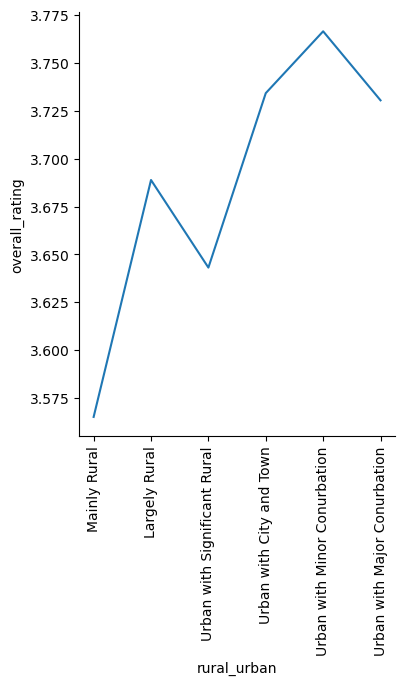

In [67]:
draw_relplot(england_reviews_aggregated, 'overall_rating')

Jobs rated the highest appear to be located more urban areas with a sharp drop off for the very most urban areas. The least rated jobs are in the most rural areas. Lets plot this on a map to see if more patterns emerge. Next I produce a choropleth map coloured to reflect the overall rating in different areas. Over the top of this I draw a dot indicating the areas rural urban classification broken down as below.

1. Mainly Rural (80% or more of the population resides in rural areas) <font color=cyan>(Cyan)</font>
2. Largely Rural (Between 50% and 79% of the population resides in rural areas) <font color=blue>(Blue)</font>
3. Urban with Significant Rural (Between 26% and 49% of the population resides in rural areas) <font color=purple>(Purple)</font>
4. Urban City and Town <font color=pink>(Pink)</font>
5. Urban with Minor Conurbation <font color=brown>(Brown)</font>
6. Urban with Major Conurbation <font color=grey>(Grey)</font>

In [69]:
m = draw_map(england_reviews_analysis_loc)
draw_choropleth(england_reviews_analysis_loc, 'overall_rating', m)
draw_colour_points(england_reviews_analysis_loc, m)
draw_rural_urban_legend(m)
m

The patterns present on the map follow a pattern similar to the line chart overall. However an interesting pattern can be seen, rural areas adjacent to conurbations and cities often have a higher overall rating score. This pattern can be seen with the areas adjacent to Liverpool/Manchester, Bristol, Southampton/Portsmouth and to a degree London. Job ratings are not universally better in rural areas however. However the rating of jobs in rural areas in the the East of the country (East Anglia) and Cumbria is quite high. Interestingly these are areas with some of the lowest population density (Wikipedia, 2023). Is this perhaps because commuting is easier to the edge of cities and provides a better overall job experience? Do the edge of larger urban areas provide many of the benefits of working in a very urban area without many of the drawbacks? 

### Analysis of Work Life Balance Metric

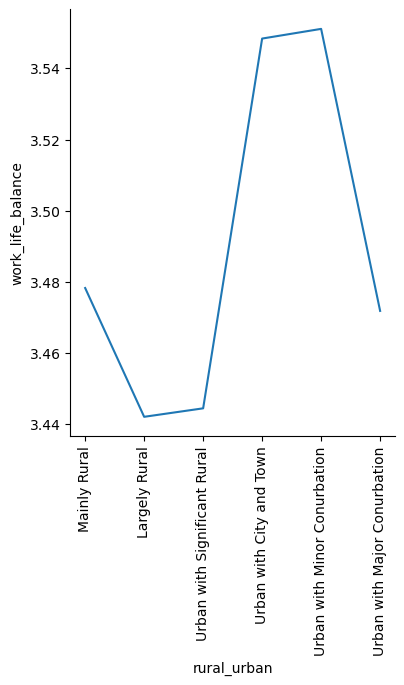

In [70]:
draw_relplot(england_reviews_aggregated, 'work_life_balance')

Interestingly jobs with the best work life balance are not located in the most rural areas. The work life balance ratings of jobs increases as their location becomes more urban. As with the Overall rating there is a sharp drop off for jobs in the most urban areas.

In [71]:
m = draw_map(england_reviews_analysis_loc)
draw_choropleth(england_reviews_analysis_loc, 'work_life_balance', m)
draw_colour_points(england_reviews_analysis_loc, m)
draw_rural_urban_legend(m)
m

Overall the map shows that work life balance ratings for jobs are lower than overall ratings. The shows many of the patterns present in the overall rating map with one key difference. work life balance of jobs seems to be worse in the South of the country than further North. With both rural and urban areas in the south suffering from a worse work life balance. Jobs in some London boroughs, particularly south London, also show a good work life balance.

### Analysis of Career Opportunities Metric

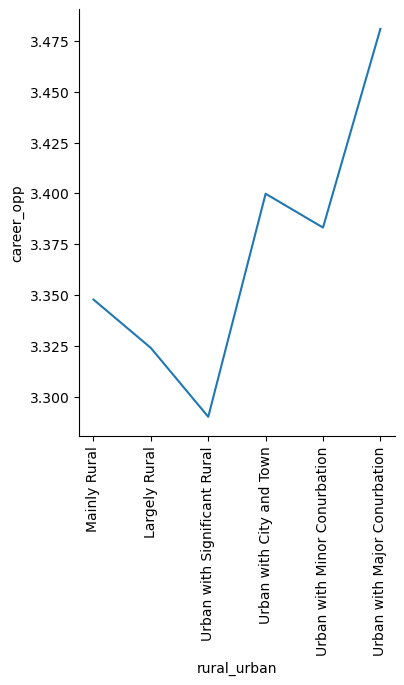

In [72]:
draw_relplot(england_reviews_aggregated, 'career_opp')

Career opportunities in jobs follow a general uptrend as locations become more urban. This is somewhat predictable as the greater number of opportunities in the most urban areas. Interesting The worst perceived career opportunities exist in the urban areas with significant rural category.

In [73]:
m = draw_map(england_reviews_analysis_loc)
draw_choropleth(england_reviews_analysis_loc, 'career_opp', m)
draw_colour_points(england_reviews_analysis_loc, m)
draw_rural_urban_legend(m)
m

This is one category where London appears to do better overall as a major urban area. Areas next to the conurbations of Liverpool and Manchester still appear favourable in this regard. Overall the South coast, Welsh border and North East fare the worst.

### Analysis of Compensation and Benefits Metric

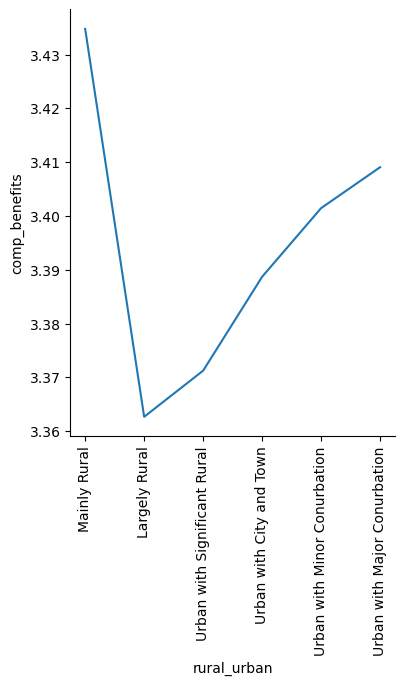

In [74]:
draw_relplot(england_reviews_aggregated, 'comp_benefits')

Compensation and benefits follow a similar pattern to previous ratings with people slightly happier with their compensation and benefits as areas become more urban. However jobs in the most rural areas appear to have the best perceived compensation and benefits. One has to remember that this is a subjective rather than an objective rating so increased objective compensation in the most urban areas could be balanced out by increased living or travel costs.

In [75]:
m = draw_map(england_reviews_analysis_loc)
draw_choropleth(england_reviews_analysis_loc, 'comp_benefits', m)
draw_colour_points(england_reviews_analysis_loc, m)
draw_rural_urban_legend(m)
m

Interestingly The pattern of compensation and benefits seems to form a North South pattern. With jobs on the whole having better relative compensation and benefits than those in the South. this could possibly be increased costs in the South (such as housing) cancelling out a greater objective compensation.

### Analysis of Senior Management Metric

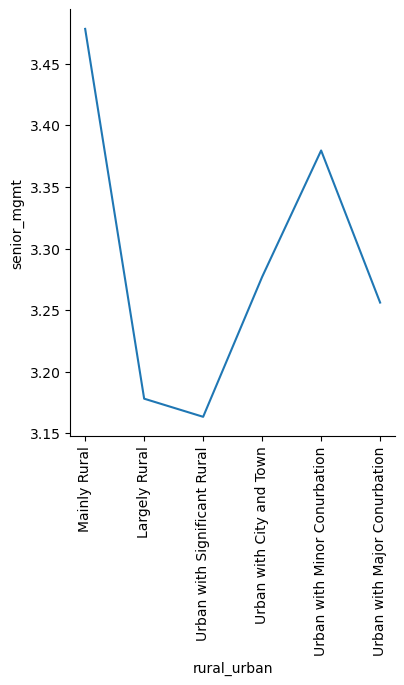

In [76]:
draw_relplot(england_reviews_aggregated, 'senior_mgmt')

Interestingly the jobs most happy with senior management are located in the most rural areas. However after this the rating of senior management increases as jobs become more urban with a sharp drop off again for the most urban areas.

In [77]:
m = draw_map(england_reviews_analysis_loc)
draw_choropleth(england_reviews_analysis_loc, 'senior_mgmt', m)
draw_colour_points(england_reviews_analysis_loc, m)
draw_rural_urban_legend(m)
m

As opposed to other ratings senior management ratings form an East West divide on the map. The worst perception of senior management is in the urban with city and town, urban with significant rural and largely rural areas to the West of the country.

### WordCloud Analysis

As a final analysis of this data I wish to carry out a wordcloud analysis of England as a whole to see the general positives and negatives of working in England. For this I will use the pros and cons columns in the pandas dataframe. Below I will define a function to draw wordclouds with an image mask.

In [78]:
# https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb
def draw_wordcloud(dataframe, column, colours):
    image_mask =  np.array(Image.open('images\workers.JPG')) 
    # selects the dataframe column and converts to list
    review_text = dataframe[column].tolist() 
    # takes the list and then joins all strings together to form one long string, converts to lower case 
    review_text = ' '.join(review_text).lower()
    # store wordcloud to variable, set stopwords to equal those present in STOPWORDS module, set collocation 
    # threshold to set occurances of two word patterns (bigrams)
    wordcloud = WordCloud(stopwords=STOPWORDS, min_word_length=4, 
                          collocation_threshold=5, width=800, height=600, 
                          max_words=200, background_color = 'black', mask=image_mask, contour_color='grey', 
                          contour_width=2, colormap=colours).generate(review_text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

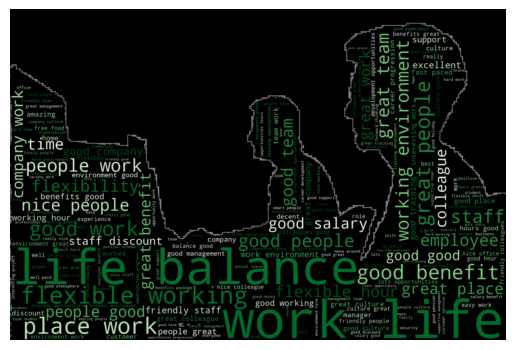

In [79]:
draw_wordcloud(england_reviews_analysis,"pros","Greens")

Overall work life balance and flexible working appears to be a major factor in peoples positive job reviews.

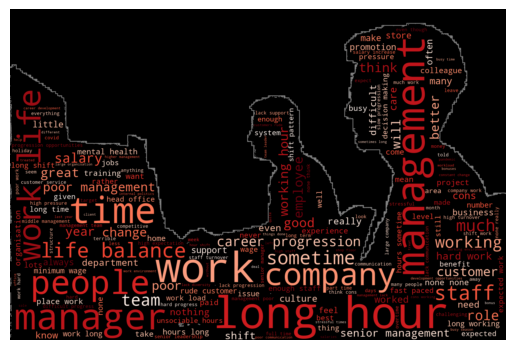

In [80]:
draw_wordcloud(england_reviews_analysis,"cons","Reds")

Work life balance also appears in many negative reviews. This combined with the prevalence of the phrase 'long hour' implies that a poor work life balance contributes to negative reviews. The word 'management' also appears in many negative reviews but is not so prevalent in the positive reviews.

Interestingly the wordcloud analysis reflects the geographical data to a degree with work life balance being a major driver  in both positive and negative reviews. This is reflected in the geographical data whereby large parts of the country report a slightly lesser score for the work life balance metric. The prevalence of the word management in the reviews is also reflected in the geographical data of the senior management rating with large parts of the country giving negative senior management ratings. 

## Conclusion and Critical Evaluation

I feel this project has highlighted some interesting patterns within the data regarding job satisfaction. As suspected there isn't a simple split between the ratings of jobs in rural areas vs those in urban areas. Neither is it really a simple distinction between good cities and bad cities to work. It has been interesting to see how the project has highlighted how jobs in areas surrounding the most urban areas are often rated the highest. It has also been interesting to observe the North South split regarding workers compensation and benefits and see that costs in the south are potentially cancelling out higher wages. I think for my own personal search I will be following what I have found, and focus my job search in areas surrounding cities and urban areas. 

Critically I feel that the project does have a number of limitations: 

I feel that spreading the 10000 reviews across the country has potentially spread the data too thinly. Also this combined with the fact that more reviews were based in urban areas, especially London, has meant that the representation of rural areas has suffered more from extreme ratings (e.g all 1's or 5s). I have tried to combat this by removing areas with just one review but I feel the best method would have been to take a far larger dataset and take for example a minimum 10 reviews from each area and calculate ratings based on that. That would have provided ratings that suffered less from extreme reviews and were more balanced. 

There is the potential for bias in the reviews with people really only writing online reviews when they have a very negative experience. This has the potential to make the ratings more negative overall.

## References and Resources

### References

- O. Atherton, E. Willroth, E. Graham, J. Luo, D. Mroczek, M. Lewis-Thames, "Rural– urban differences in personality traits and well-being in adulthood", Feb 2023. doi: 10.1111/jopy.12818. Epub ahead of print. PMID: 36725776. Available: https://www.midus.wisc.edu/findings/pdfs/2662.pdf
- S. Gottipati, K. J. Shim and S. Sahoo, "Glassdoor Job Description Analytics – Analyzing Data Science Professional Roles 
and Skills," 2021 IEEE Global Engineering Education Conference (EDUCON), Vienna, Austria, 2021, pp. 1329-1336, 
doi: 10.1109/EDUCON46332.2021.9453931.
- UK Government (2021, Aug) Collection, Rural Urban Classification, Definition of rural areas using the Rural Urban Classification. [online] Available: https://www.gov.uk/government/collections/rural-urban-classification
- Young, H (2023, Jun) 10 Best UK Cities for Work in 2022 [online]  Available:https://startups.co.uk/analysis/best-cities-for-work-uk/
- Statista (2023, Jun), Average weekly hours of work for full-time workers in the United Kingdom from May 1992 to March 2023 [Online]  Available:https://www.statista.com/statistics/280763/average-working-hours-uk/
- Glassdoor (2023, Jun) Terms and Conditions [Online]  Available:https://www.glassdoor.com/about/terms/#:~:text=or%20to%20scrape
- Wikipedia (2023, Jun) List of Districts by Population density https://en.wikipedia.org/wiki/List_of_English_districts_by_population_density

### Resources

#### Datasets

- Glassdoor job reviews dataset by David Gauthier. Available: https://www.kaggle.com/datasets/davidgauthier/glassdoor-job-reviews
- Rural Urban Classification https://www.gov.uk/government/statistics/2011-rural-urban-classification-lookup-tables-for-all-geographies
- Area boundaries shp files https://borders.ukdataservice.ac.uk/ukborders/easy_download/prebuilt/shape/infuse_dist_lyr_2011.zip
- County boundaries shp files https://osdatahub.os.uk/downloads/open/BoundaryLine
- shp files reduced in size using https://mapshaper.org/
- Nominatim docs https://nominatim.org/release-docs/latest/api/Overview/

#### Dataset Licences

- Glassdoor Review data licence https://creativecommons.org/licenses/by-sa/4.0/

- OSM data https://www.openstreetmap.org/copyright

- Nominatim T&Cs https://operations.osmfoundation.org/policies/nominatim/

- Uk boundaries geojson data https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/ 

#### Images

- Workers image for wordcloud, Tim van der Kuip, Available: https://unsplash.com/photos/CPs2X8JYmS8 

#### Data Cleaning and Processing

- Stackoverflow (2023, Jun) getting file size in python [online] https://stackoverflow.com/questions/6591931/getting-file-size-in-python
- Stackoverflow (2023, Jun) how-to-get-the-size-of-tar-gz-in-mb-file-in-python [online] https://stackoverflow.com/questions/6080477/how-to-get-the-size-of-tar-gz-in-mb-file-in-python
- Digital Ocean (2023, Jun) How to Get File Size in Python. Available: https://www.digitalocean.com/community/tutorials/how-to-get-file-size-in-python
- Stackoverflow (2023, Jun) pandas dataframe str contains and operation [online] https://stackoverflow.com/questions/37011734/pandas-dataframe-str-contains-and-operation
- Stackoverflow (2023, Jun) tilde sign in pandas dataframe [online] https://stackoverflow.com/questions/46054318/tilde-sign-in-pandas-dataframe
- Geeks for Geeks (2023, Jun) python pandas dataframe sample [online] https://www.geeksforgeeks.org/python-pandas-dataframe-sample/
- Stackoverflow (2023, Jun) regex find last word between comma [online] https://stackoverflow.com/questions/30945461/regex-find-last-word-between-comma
- Stackoverflow (2023, Jun) pandas column not found after doing an aggregation function [online] https://stackoverflow.com/questions/75313765/pandas-column-not-found-after-doing-an-aggregation-function
- Stackoverflow (2023, Jun) convert physical addresses to geographic locations latitude and longitude [online] https://stackoverflow.com/questions/58439692/convert-physical-addresses-to-geographic-locations-latitude-and-longitude
- Nominatim (2023, Jun) documentation [online] https://nominatim.org/release-docs/latest/api/Overview/
- Latlong (2023, Jun) latitude longitude map [online] https://www.latlong.net/
- Analyseup python pandas add new column to dataframe (2023, Jun) [online] https://www.analyseup.com/learn-python-for-data-science/python-pandas-add-new-column-to-dataframe.html
- Stackoverflow (2023, Jun) [online] https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
- Levelup.Gitconnected.com (2023, Jun) Simple geocoding in python [online]  Available:https://levelup.gitconnected.com/simple-geocoding-in-python-fb28ee5272e0
- Statology.org (2023, Jun) valueerror cannot set a row with mismatched columns [online] Available:https://www.statology.org/valueerror-cannot-set-a-row-with-mismatched-columns/


#### Data analysis

- Stackoverflow (2023, Jun) custom sorting in pandas dataframe [online] Available:https://stackoverflow.com/questions/13838405/custom-sorting-in-pandas-dataframe
- Stackoverflow (2023, Jun) python removing rows on count condition [online] Available:https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition
- UOL week 8 jupyter notebook and webinar by Llewelyn Fernandes
- Stackoverflow (2023, Jun) unsure how to use colormap with folium marker plot [online] Available:https://stackoverflow.com/questions/56876620/unsure-how-to-use-colormap-with-folium-marker-plot
- Stackoverflow (2023, Jun) create and visualise choropleth map with folium [online] Available:https://medium.com/analytics-vidhya/create-and-visualize-choropleth-map-with-folium-269d3fd12fa0
- Stackoverflow (2023, Jun) folium documantation [online] Available:https://python-visualization.github.io/folium/quickstart.html
- Stackoverflow (2023, Jun) python attribute error io text io wrapper object has no attribute split [online] Available:https://stackoverflow.com/questions/17569679/python-attributeerror-io-textiowrapper-object-has-no-attribute-split
- Python.org (2023, Jun) reading and writing files tutorials [online] Available:https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files
- Stackoverflow (2023, Jun) remove legend in a folium choropleth map [online] Available:https://www.roelpeters.be/remove-the-legend-in-a-folium-choropleth-map/
- Stackoverflow (2023, Jun) create a legend on a folium map [online] Available:https://stackoverflow.com/questions/37466683/create-a-legend-on-a-folium-map
- Ferhatmetin Medium.com (2023, Jun) map-visualisation with folium [online] Available:https://medium.com/datasciencearth/map-visualization-with-folium-d1403771717
- Gokhe, S medium.com (2023, Jun) create and visualise choropleth map with folium [online] Available https://medium.com/analytics-vidhya/create-and-visualize-choropleth-map-with-folium-269d3fd12fa0
- Stackoverflow (2023, Jun) Converting a Pandas GroupBy output from Series to DataFrame Available:https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe
- Stackoverflow (2023, Jun) Pandas Column Not Found After Doing an Aggregation Function Available:https://stackoverflow.com/questions/75313765/pandas-column-not-found-after-doing-an-aggregation-function
- Stackoverflow (2023, Jun) Regex find last word between column Available:https://stackoverflow.com/questions/30945461/regex-find-last-word-between-comma    
- Stackoverflow (2023, Jun) pandas aggregate column doesnt exist Available:https://stackoverflow.com/questions/71617690/pandas-aggregate-column-doesnt-exist
- Geopy (2023, Jun) geopy documentation Available:https://geopy.readthedocs.io/en/stable/
- Stackoverflow (2023, Jun) converting strings to a lower case in pandas https://stackoverflow.com/questions/42750551/converting-strings-to-a-lower-case-in-pandas